In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import joblib

import spacy
import contractions
import string
import re
from bs4 import BeautifulSoup
from unidecode import unidecode
import nltk
import swifter
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

from sklearn.pipeline import Pipeline
from transformers import AutoTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
from multiprocessing import Pool
from sklearn.feature_extraction.text import HashingVectorizer


from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
df = pd.read_csv('/WELFake_Cleaned.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71341 entries, 0 to 71350
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   71341 non-null  int64 
 1   text    71341 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [6]:
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

X_train_bow = preprocessing.normalize(X_train_bow)
X_test_bow = preprocessing.normalize(X_test_bow)

In [7]:
SVC = svm.SVC()

In [8]:
SVC.fit(X_train_bow, y_train)

prd_SVC = SVC.predict(X_test_bow)

In [9]:
print(classification_report(y_test, prd_SVC))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     10544
           1       0.95      0.96      0.96     10859

    accuracy                           0.96     21403
   macro avg       0.96      0.96      0.96     21403
weighted avg       0.96      0.96      0.96     21403



In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [12]:
binary_predictions = []

for i in prd_SVC:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

Accuracy on testing set: 0.9581367098070364
Precision on testing set: 0.962980016576112
Recall on testing set: 0.954889964386814


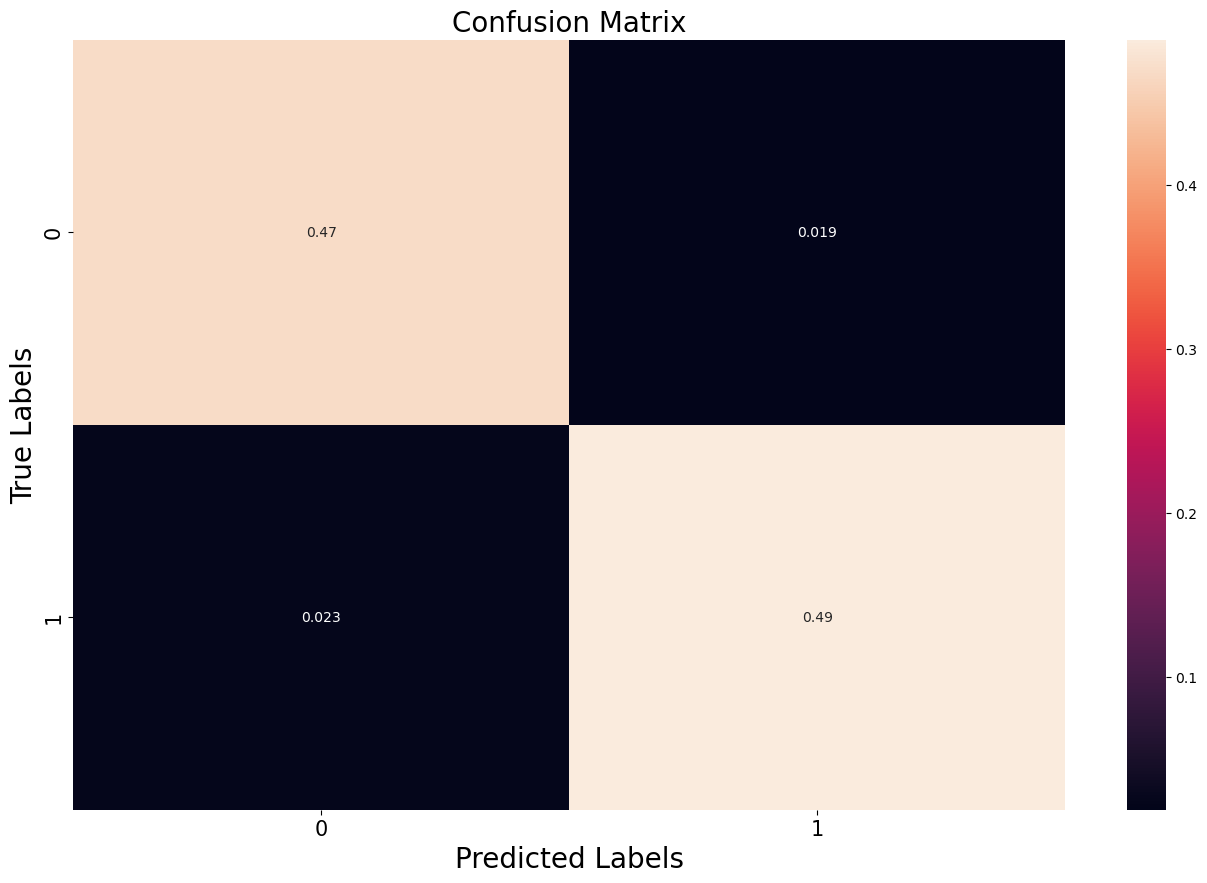

In [13]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

In [ ]:
prd_df = pd.read_csv('/HugeDatasetPredictSample.csv')

val_text = prd_df['text']
val_label = prd_df['label']

In [15]:
val_text_bow = vectorizer.transform(val_text)

val_text_bow = preprocessing.normalize(val_text_bow)

In [16]:
pred = SVC.predict(val_text_bow)

In [17]:
binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

Accuracy on testing set: 0.7038
Precision on testing set: 0.8883572567783095
Recall on testing set: 0.5160274226422087


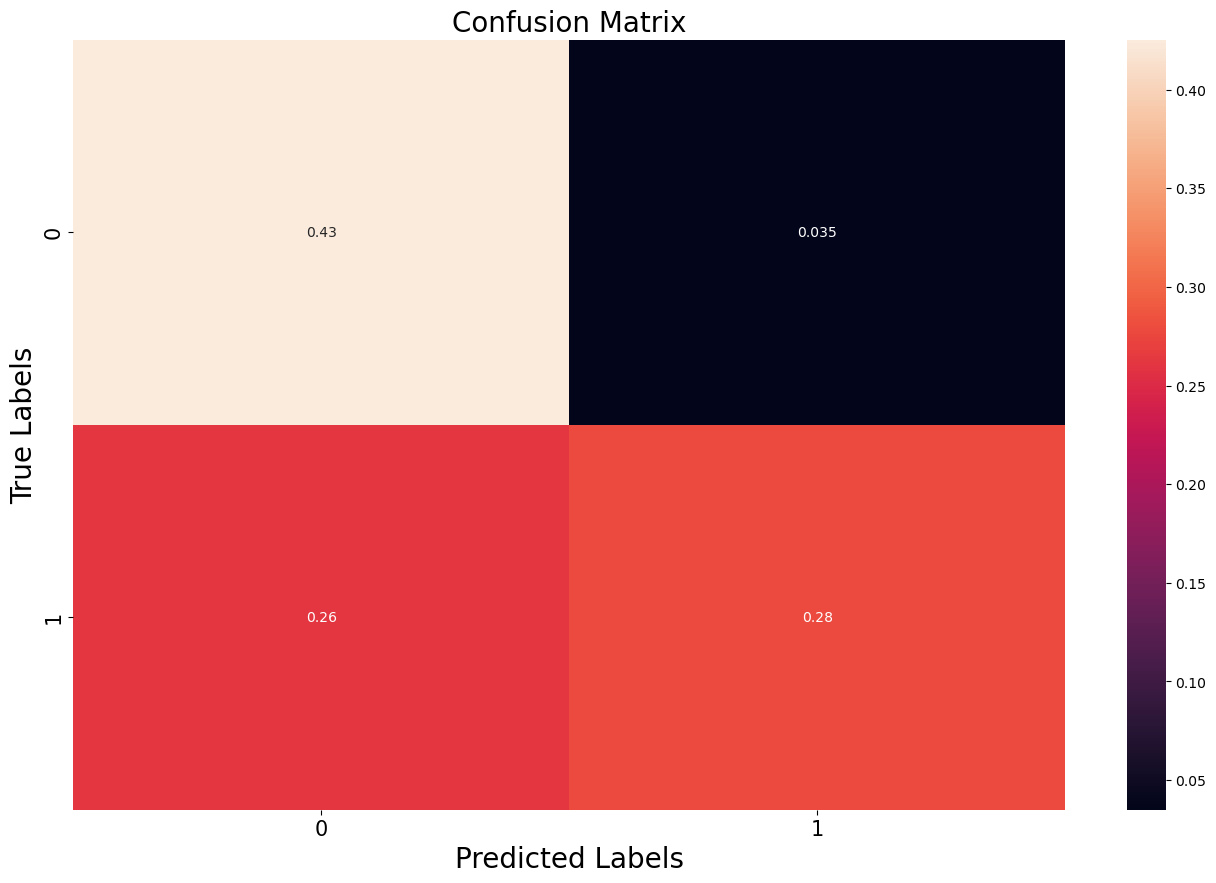

In [18]:
matrix = confusion_matrix(binary_predictions, val_label, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions, val_label))
print('Precision on testing set:', precision_score(binary_predictions, val_label))
print('Recall on testing set:', recall_score(binary_predictions, val_label))

In [19]:
print("WELFake Classification Report on Fake News Corpus Validation set (Using SVC)\n")
print(classification_report(binary_predictions, val_label))

WELFake Classification Report on Fake News Corpus Validation set (Using SVC)

              precision    recall  f1-score   support

           0       0.62      0.92      0.74      4603
           1       0.89      0.52      0.65      5397

    accuracy                           0.70     10000
   macro avg       0.75      0.72      0.70     10000
weighted avg       0.76      0.70      0.69     10000



Accuracy on testing set: 0.46781277450119213
Precision on testing set: 0.8513667425968109
Recall on testing set: 0.4456699955283947


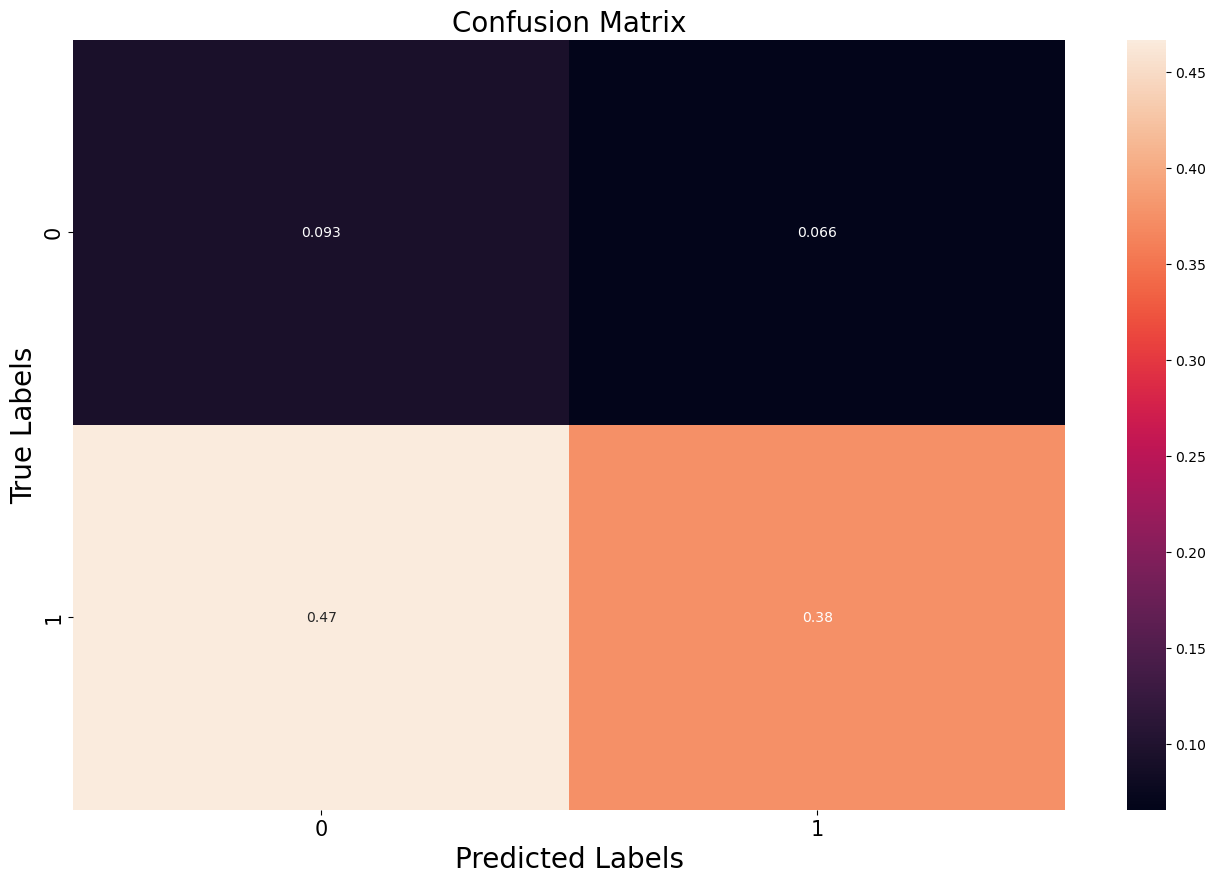

In [ ]:
liar_df = pd.read_csv('/Liar_preprocessed_nolemma.csv')

liar_text = liar_df['text']
liar_label = liar_df['Label']

liar_text_bow = vectorizer.transform(liar_text)

liar_text_bow = preprocessing.normalize(liar_text_bow)

pred_liar = SVC.predict(liar_text_bow)

binary_predictions_liar = []

for i in pred_liar:
    if i >= 0.5:
        binary_predictions_liar.append(1)
    else:
        binary_predictions_liar.append(0) 
        
matrix = confusion_matrix(binary_predictions_liar, liar_label, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions_liar, liar_label))
print('Precision on testing set:', precision_score(binary_predictions_liar, liar_label))
print('Recall on testing set:', recall_score(binary_predictions_liar, liar_label))

In [21]:
print("WELFake Classification Report on LIAR set (Using SVC)\n")
print(classification_report(binary_predictions_liar, liar_label))

WELFake Classification Report on LIAR set (Using SVC)

              precision    recall  f1-score   support

           0       0.17      0.59      0.26      1260
           1       0.85      0.45      0.59      6709

    accuracy                           0.47      7969
   macro avg       0.51      0.52      0.42      7969
weighted avg       0.74      0.47      0.53      7969

